In [1]:
import tensorflow as tf 
print(tf.__version__) 

2.2.0-rc2


In [0]:
import os
import zipfile
import random
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [3]:
import keras
from keras.datasets import mnist

from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D,Conv2DTranspose, Flatten, Dropout, MaxPooling2D,UpSampling2D

Using TensorFlow backend.


In [0]:
# Model configuration
img_width, img_height = 28, 28
batch_size = 150
no_epochs = 50
validation_split = 0.2
verbosity = 1
max_norm_value = 2.0
noise_factor = 0.55
number_of_visualizations = 6
patch_size=(28,28)

In [0]:
 #Load MNIST dataset
(input_train, target_train), (input_test, target_test) = mnist.load_data()


In [6]:
input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 1)
input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 1)
input_shape = (img_width, img_height, 1)
print(input_shape)


(28, 28, 1)


In [0]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

In [0]:
train_patches=[]
test_patches=[]
train_patches=input_train
test_patches=input_test

In [67]:
train_patches.shape

(60000, 28, 28, 1)

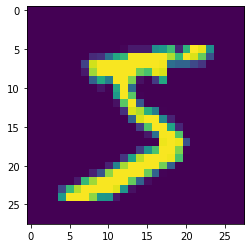

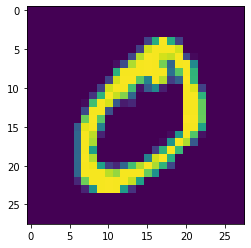

In [9]:
for i in  range(2): #range(train_patches.shape[0]):
    patch= train_patches[i,:,:]
    patch = np.squeeze(patch)
    fig = plt.figure()
    plt.imshow(patch)
    plt.show()

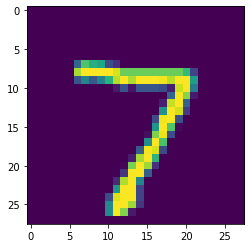

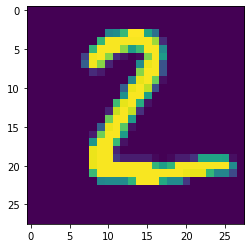

In [10]:
for i in range(2):#range(test_patches.shape[0]):
    patch= test_patches[i,:,:]
    patch = np.squeeze(patch)
    fig = plt.figure()
    plt.imshow(patch)
    plt.show()

In [0]:
def add_gaussian_noise(image_in, mu, sigma):
    temp_image = np.float64(np.copy(image_in))

    h = temp_image.shape[0]
    w = temp_image.shape[1]
    noise = np.random.normal(mu,sigma, [h,w])
    noisy_image = np.zeros(temp_image.shape, np.float64)
    noisy_image = temp_image + noise
    return noisy_image

In [38]:
mean=0
sigma=0.5
noisy_train_patches=[]
for i in range(train_patches.shape[0]):
    patch= train_patches[i,:,:]
    patch = np.squeeze(patch)
    noisy_patch=add_gaussian_noise(patch, mean,sigma)
    noisy_train_patches.append(noisy_patch)
noisy_train_patches= np.array(noisy_train_patches, dtype=np.float)   
noisy_train_patches = np.expand_dims(noisy_train_patches,axis=-1)
print(noisy_train_patches.shape )



noisy_test_patches=[]
for i in range(test_patches.shape[0]):
    patch= test_patches[i,:,:]
    patch = np.squeeze(patch)
    noisy_test_patch=add_gaussian_noise(patch, mean,sigma)
    noisy_test_patches.append(noisy_test_patch)
noisy_test_patches= np.array(noisy_test_patches, dtype=np.float)   
noisy_test_patches = np.expand_dims(noisy_test_patches,axis=-1)
print(noisy_test_patches.shape )

(60000, 28, 28, 1)
(10000, 28, 28, 1)


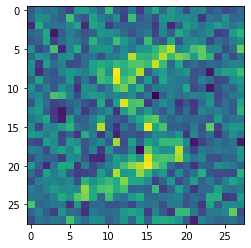

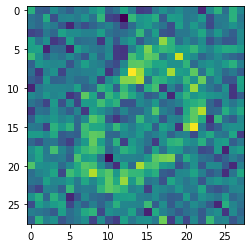

In [39]:
for i in range(2): #range(noisy_train_patches.shape[0]):
    patch= noisy_train_patches[i,:,:]
    patch = np.squeeze(patch)
    fig = plt.figure()
    plt.imshow(patch)
    plt.show()

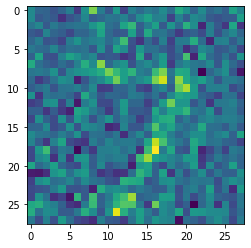

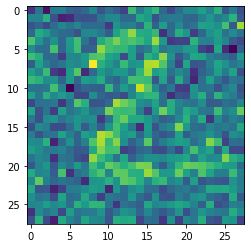

In [14]:
for i in range(2):#range(noisy_test_patches.shape[0]):
    patch= noisy_test_patches[i,:,:]
    patch = np.squeeze(patch)
    fig = plt.figure()
    plt.imshow(patch)
    plt.show()

In [40]:
model = tf.keras.models.Sequential([
    Conv2D(64, (3,3), padding='same', activation='relu', kernel_initializer='he_normal',input_shape=(patch_size[0],patch_size[1],1)),
  

    Conv2D(32, (3,3), padding='same', activation='relu',kernel_initializer='he_normal'),


    Conv2DTranspose(32, (3,3), padding='same', activation='relu',kernel_initializer='he_normal'),

    Conv2DTranspose(64, (3,3), padding='same', activation='relu',kernel_initializer='he_normal'),

    Conv2D(1, (3,3), padding='same', activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 1)         577       
Total params: 47,425
Trainable params: 47,425
Non-trainable params: 0
_________________________________________________________________


In [0]:

model.compile(optimizer='adam', loss='binary_crossentropy')
#model.compile(optimizer='adam', loss='mean_squared_error')

In [54]:
history = model.fit(
    noisy_train_patches,
    train_patches,
    batch_size=150,
    epochs=10#0
    #shuffle=True,
    #callbacks=[checkpoint_outputs]
)

Epoch 1/10
400/400 [==============================] - 4s 11ms/step - loss: 0.1610
Epoch 2/10
400/400 [==============================] - 4s 11ms/step - loss: 0.0977
Epoch 3/10
400/400 [==============================] - 4s 11ms/step - loss: 0.0959
Epoch 4/10
400/400 [==============================] - 4s 11ms/step - loss: 0.0950
Epoch 5/10
400/400 [==============================] - 4s 11ms/step - loss: 0.0943
Epoch 6/10
400/400 [==============================] - 4s 11ms/step - loss: 0.0940
Epoch 7/10
400/400 [==============================] - 4s 11ms/step - loss: 0.0935
Epoch 8/10
400/400 [==============================] - 4s 11ms/step - loss: 0.0933
Epoch 9/10
400/400 [==============================] - 4s 11ms/step - loss: 0.0930
Epoch 10/10
400/400 [==============================] - 4s 11ms/step - loss: 0.0927


In [55]:
denoised_train_patches=[]
denoised_train_patches = model.predict(noisy_train_patches)
denoised_train_patches.shape

(60000, 28, 28, 1)

In [56]:
denoised_test_patches=[]
denoised_test_patches = model.predict(noisy_test_patches)
denoised_test_patches.shape

(10000, 28, 28, 1)

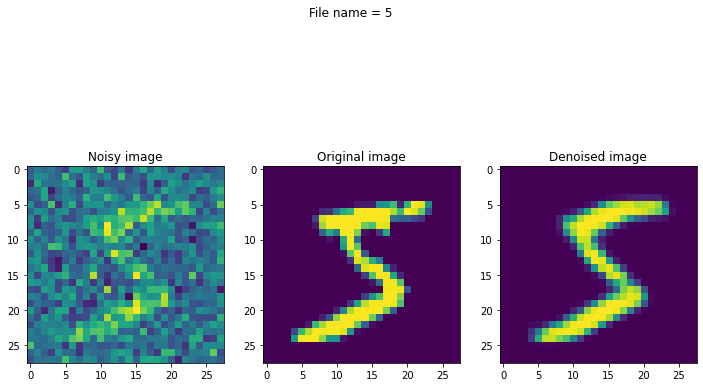

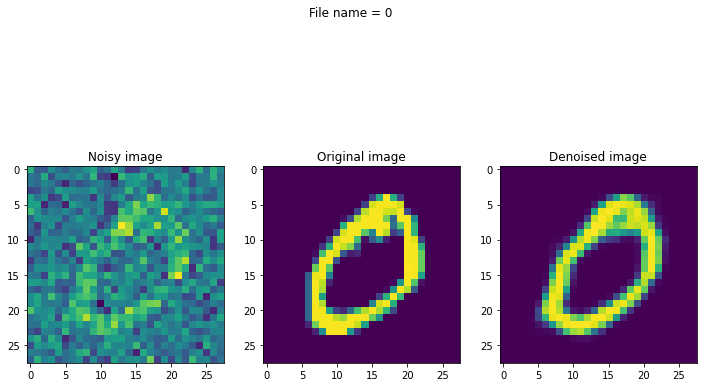

In [59]:
# Plot denoised train images
number_of_visualizations=2
for i in range(0, number_of_visualizations):
  # Get the sample and the reconstruction
  noisy_image = noisy_train_patches[i,:,:]
  noisy_image = np.squeeze(noisy_image)

  pure_image  = train_patches[i,:,:]
  pure_image = np.squeeze(pure_image)

  denoised_image = denoised_train_patches[i,:,:]
  denoised_image = np.squeeze(denoised_image)

  input_class =target_train[i]
  # Matplotlib preparations
  fig, axes = plt.subplots(1, 3)
  fig.set_size_inches(12, 7.5)
  # Plot sample and reconstruciton
  axes[0].imshow(noisy_image)
  axes[0].set_title('Noisy image')
  axes[1].imshow(pure_image)
  axes[1].set_title('Original image')
  axes[2].imshow(denoised_image)
  axes[2].set_title('Denoised image')
  fig.suptitle(f'File name = {input_class}')
  plt.show()

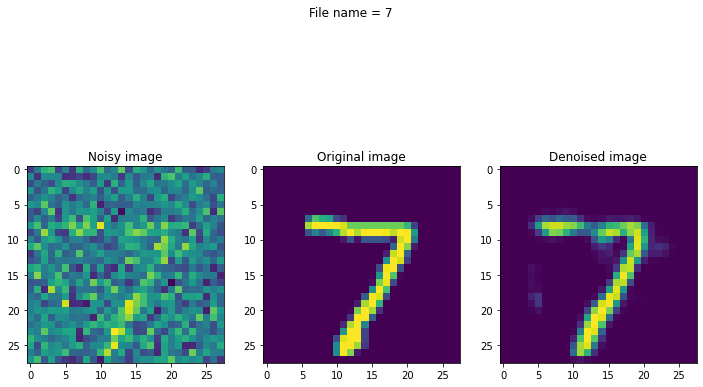

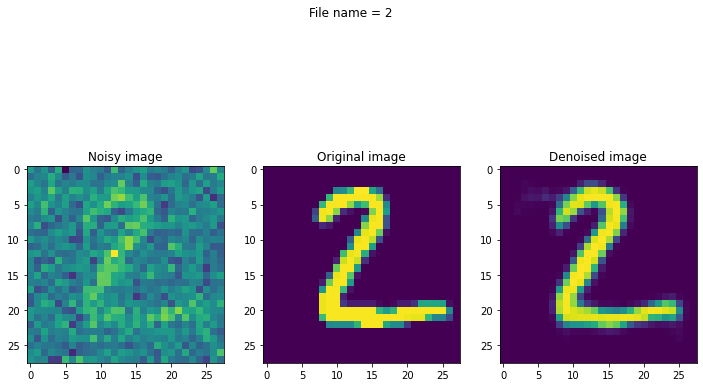

In [60]:
# Plot denoised images
number_of_visualizations=2
for i in range(0, number_of_visualizations):
  # Get the sample and the reconstruction
  noisy_image = noisy_test_patches[i,:,:]
  noisy_image = np.squeeze(noisy_image)

  pure_image  = test_patches[i,:,:]
  pure_image = np.squeeze(pure_image)

  denoised_image = denoised_test_patches[i,:,:]
  denoised_image = np.squeeze(denoised_image)

  input_class = target_test[i]
  # Matplotlib preparations
  fig, axes = plt.subplots(1, 3)
  fig.set_size_inches(12, 7.5)
  # Plot sample and reconstruciton
  axes[0].imshow(noisy_image)
  axes[0].set_title('Noisy image')
  axes[1].imshow(pure_image)
  axes[1].set_title('Original image')
  axes[2].imshow(denoised_image)
  axes[2].set_title('Denoised image')
  fig.suptitle(f'File name = {input_class}')
  plt.show()